In [345]:
import matplotlib.pyplot as plt
import numpy as np

font = {
    'family' : 'serif',
    'size'   : 15,
    'weight' : 'normal'
}
colors = ['r', 'm', 'darkorange', 'gold', 'darkkhaki', 'lightskyblue', 'y', 'blueviolet']
marker_colors = ['b', 'k', 'indigo', 'maroon', 'darkgreen', 'teal']

plt.rc('font', **font)
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
plt.rc('axes', titlesize=22)
plt.rc('legend', fontsize=20)

# 3. Functional sequences

A functional sequence ${f_n(x)}$ is uniformly convergent to $f(x)$ on $E$ if $\lim\limits_{n\to\infty} r_n = 0$, where $r_n = \sup\limits_{x\in E}|f_n(x) - f(x)|$.

In this task $E$ is always a closed interval $[a,b]$, emulated by the uniform grid $a=x_0 < x_1 < \ldots < x_{m-1} < x_m = b$, and $r_n \approx \max\limits_k |f_n(x_k) - f(x_k)|$.

**(2 points) 3.1.** Complete the code for the class $\texttt{FunctionalSequence}$. Make sure your code produces the same pictures as listed below for the seminar examples.

**Caution!** Solutions using pythonic loops will receive at most **1 point**!

In [346]:
class FunctionalSequence:
    def __init__(self, term_implementation, name, limit_function=None):
        '''
            term_implementation: a vectorized function calculating the 2d array of terms
            name, string: labels in LaTeX
            limit_function: a vectorized function calctulating the limit of the sequence
        '''
        self.term_implementation = term_implementation
        self.limit_function = limit_function
        self.name = name
    
    def terms(self, ns, domain):
        '''
            ns : np.ndarray of indices
            domain : np.ndarray of points 
            Returns a numpy 2d-array [[f_n(x)]], n in ns, x in domain
        '''
        return self.term_implementation(ns, domain)
    
    def remainders(self, ns, domain):
        '''
            ns : np.ndarray of indices
            domain : np.ndarray of points 
            Returns a numpy 2d-array [[r_n(x) = |f_n(x) - f(x)|]], n in ns, x in domain
        '''
        assert self.limit_function is not None
        return np.absolute(self.terms(ns, domain) - self.limit_function(domain))
    
    def suprema(self, ns, domain):
        '''
            ns : np.ndarray of indices
            domain : np.ndarray of points
            Returns a numpy array [r_n = max|f_n(x) - f(x)|], n in ns
        '''
        return np.amax(self.remainders(ns, domain), axis=1)
    
    def plot(self, mode, ns, domain, semilogy=False, y_lims=None):
        '''
            ns : np.ndarray of indices
            domain : np.ndarray of points
            Plots terms or remainders as functions of self.domain for n in ns
        '''
        plt.figure(figsize=(14, 7))

        #line_colors = np.random.choice(colors, size=len(ns), replace=False)
        # marker_edge_colors = np.random.choice(marker_colors, size=len(functions), replace=False)
        plot = plt.semilogy if semilogy else plt.plot
        
        if mode == 'terms':
            ys = self.terms(ns, domain).T
            plt.title(self.name)
        elif mode == 'remainders':
            ys = self.remainders(ns, domain).T
            plt.title("Remainders of " + self.name)
        plot(domain, ys, lw=3)
        
        label_list = [r'$n={}$'.format(i) for i in ns]
        if mode == 'terms' and not semilogy and self.limit_function is not None:
            plot(domain, self.limit_function(domain), lw=3, ls='--', c='r')
            label_list.append("limit")
            
        plt.grid(ls=':')
        plt.xlim(np.min(domain), np.max(domain))
        if y_lims is not None:
            if semilogy:
                plt.ylim(10 ** y_lims[0], 10 ** y_lims[1])
            else:
                plt.ylim(y_lims[0], y_lims[1])
        plt.legend(label_list);

In [347]:
def plot_sequences(sequences, labels, title, ns, semilogy=False, y_lims=None):
    '''
        Plots sequences on the same plot as functions of ns
    '''
    plt.figure(figsize=(14, 7))

    line_colors = np.random.choice(colors, size=len(sequences), replace=False)
    marker_edge_colors = np.random.choice(marker_colors, size=len(sequences), replace=False)
    plot = plt.semilogy if semilogy else plt.plot
    
    for i, sequence in enumerate(sequences):
        if len(ns) < 50:
            plot(ns, sequence, c=line_colors[i], lw=3,
                 markeredgecolor=marker_edge_colors[i], mew=2, marker='o', label=labels[i])
        else:
            plot(ns, sequence, c=line_colors[i], lw=3, label=labels[i])
    plt.grid(ls=':')
    plt.title(title)
    plt.xlim(np.min(ns), np.max(ns))
    if y_lims is not None:
        if semilogy:
            plt.ylim(10 ** y_lims[0], 10 ** y_lims[1])
        else:
            plt.ylim(y_lims[0], y_lims[1])
    plt.legend();

Consider the examples of $f_n(x) = x^n$, $g_n(x) = x^n - x^{n+1}$ and $h_n(x) = x^n - x^{2n}$
from the lecture/seminar on the segments $E_1 = [0, 0.8]$ and $E_2=[0.8, 1]$.

In [348]:
def geometric_terms(ns, domain):
    xs_grid, ns_grid = np.meshgrid(domain, ns)
    return xs_grid ** ns_grid

def geometric_diff_terms(ns, domain):
    return geometric_terms(ns, domain) * (1 - domain)

def geometric_double_diff_terms(ns, domain):
    return geometric_terms(ns, domain) * (1 - geometric_terms(ns, domain))

N_RANGE = np.arange(10, 101, 10)

Now plot the graphs of $f_n(x)$ and $g_n(x)$ for $n = 10, 20, \ldots, 100$.

**Remark.** All functions actually converge to identical zero (except for $f_n(1) = 1$), therefore, we do not plot the graphs of the remainders $r_n(x) = |f_n(x) - f(x)|$ here because $r_n(x) = f_n(x)$.

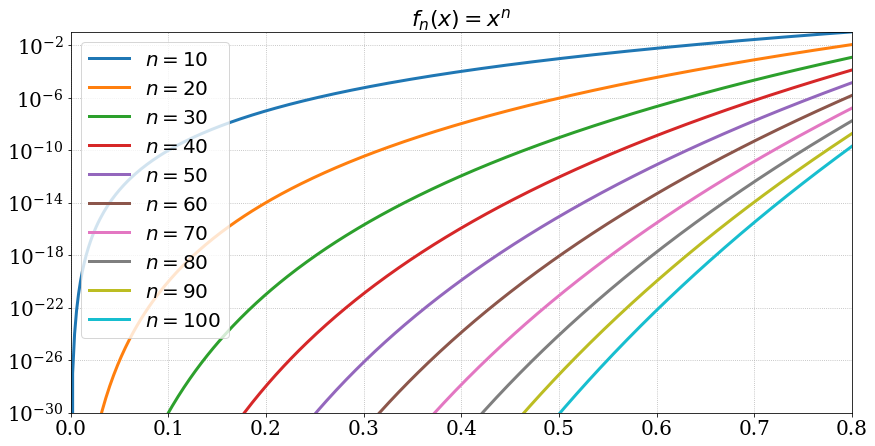

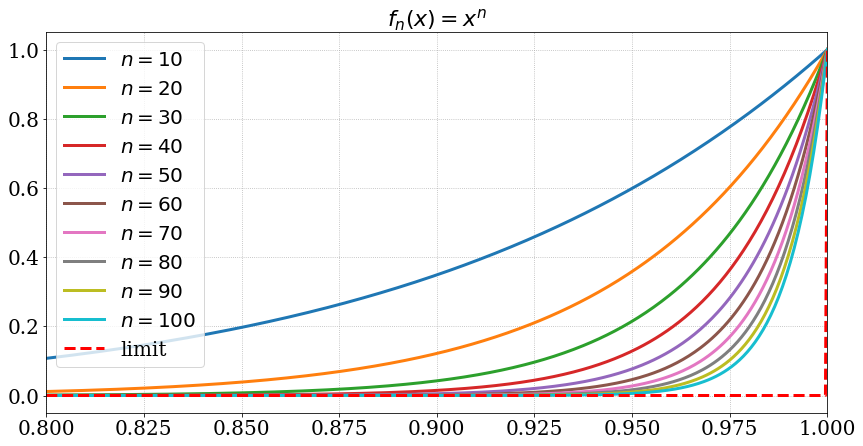

In [349]:
def powers_limit(domain):
    result = np.zeros_like(domain)
    if domain[-1] == 1:
        result[-1] = 1
    return result

right_domain = np.linspace(0.8, 1, 401)
left_domain = np.linspace(0, 0.8, 401)
x_powers = FunctionalSequence(lambda ns, domain : geometric_terms(ns, domain),
                              r'$f_n(x) = x^n$',
                              powers_limit)
x_powers.plot('terms', N_RANGE, left_domain, semilogy=True, y_lims=(-30, -1))
x_powers.plot('terms', N_RANGE, right_domain)

Note that we use the logarithmic scale on $E_1=[0, 0.8]$ since the terms vanish too fast in it.

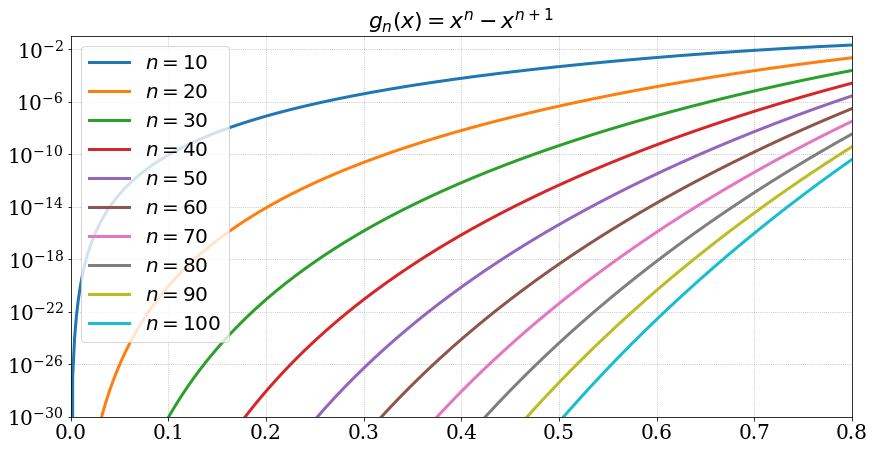

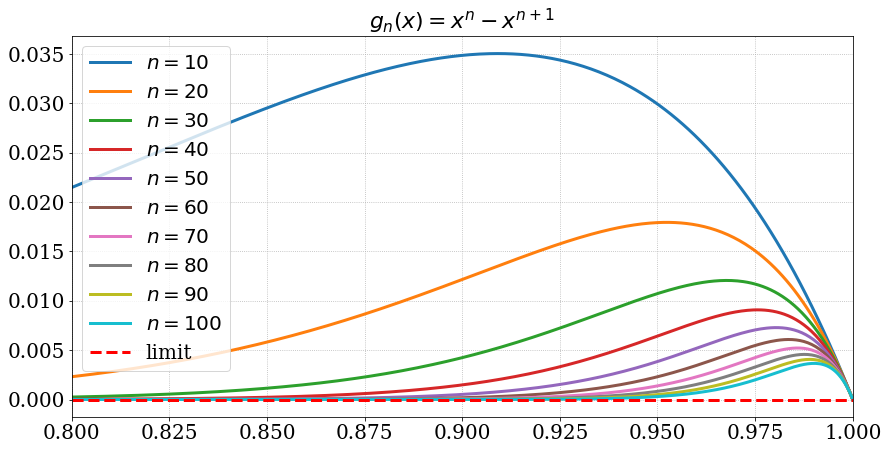

In [350]:
x_powers_diff = FunctionalSequence(geometric_diff_terms,
                                   r'$g_n(x) = x^n - x^{n+1}$',
                                   np.zeros_like)
x_powers_diff.plot('terms', N_RANGE, left_domain, semilogy=True, y_lims=(-30, -1))
x_powers_diff.plot('terms', N_RANGE, right_domain)

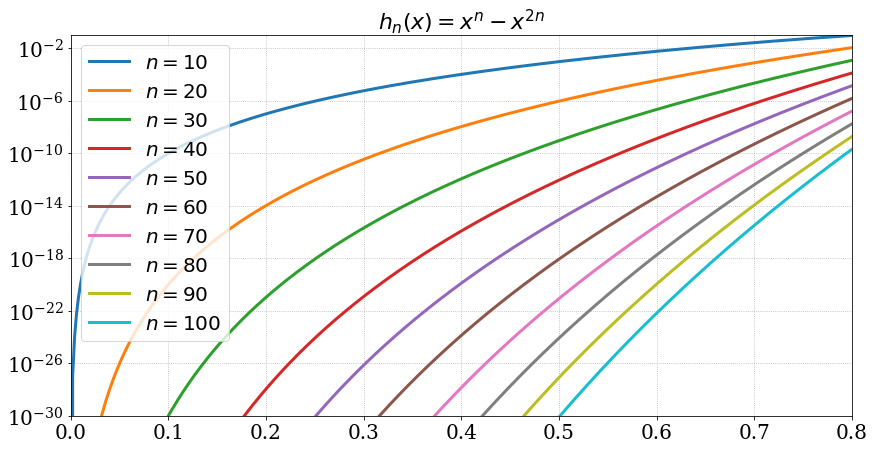

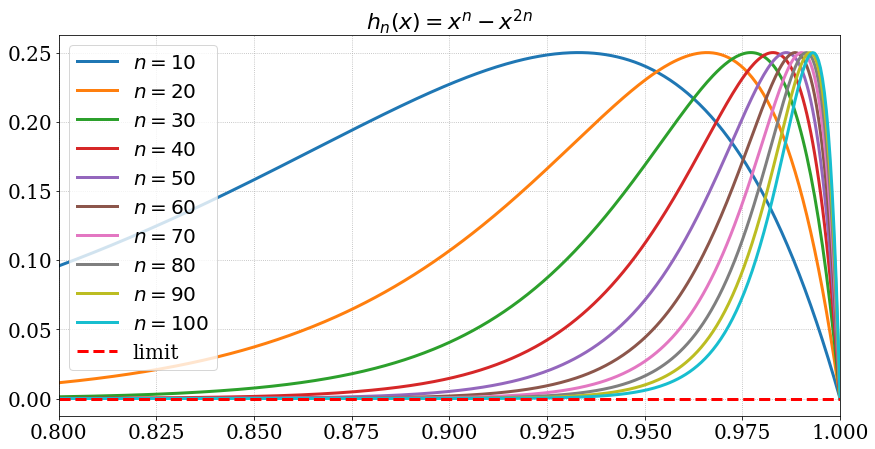

In [351]:
x_powers_double_diff = FunctionalSequence(geometric_double_diff_terms,
                                          r'$h_n(x) = x^n - x^{2n}$',
                                          np.zeros_like)
x_powers_double_diff.plot('terms', N_RANGE, left_domain, semilogy=True, y_lims=(-30, -1))
x_powers_double_diff.plot('terms', N_RANGE, right_domain)

From these pictures we can see that both $f_n \rightrightarrows 0$, $g_n \rightrightarrows 0$ and $h_n \rightrightarrows 0$ on $E_1=[0,0.8]$, $g_n \rightrightarrows 0$ on $E_2=[0.8, 1]$, whereas the sequences $f_n$ and $h_n$ are nonuniformly convergent in $E_2$ ($\lim\limits_{n\to\infty} r_n \ne 0$). To emphasize these effects, let's plot the graphs of $r_n$.

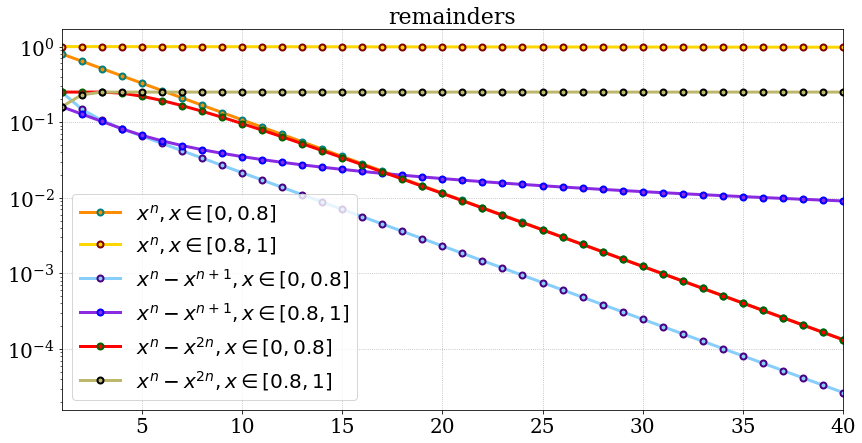

In [352]:
ns = np.arange(1, 41)
x_power_remainders_E1 = x_powers.suprema(ns, left_domain)
x_power_remainders_E2 = x_powers.suprema(ns, right_domain)
x_power_diff_remainders_E1 = x_powers_diff.suprema(ns, left_domain)
x_power_diff_remainders_E2 = x_powers_diff.suprema(ns, right_domain)
x_power_double_diff_remainders_E1 = x_powers_double_diff.suprema(ns, left_domain)
x_power_double_diff_remainders_E2 = x_powers_double_diff.suprema(ns, right_domain)
plot_sequences([x_power_remainders_E1, x_power_remainders_E2,
                x_power_diff_remainders_E1, x_power_diff_remainders_E2,
                x_power_double_diff_remainders_E1, x_power_double_diff_remainders_E2],
               [r"$x^n, x \in [0, 0.8]$", r"$x^n, x \in [0.8, 1]$",
                r"$x^{n} - x^{n+1}, x \in [0, 0.8]$", r"$x^{n} - x^{n+1}, x \in [0.8, 1]$",
                r"$x^{n} - x^{2n}, x \in [0, 0.8]$", r"$x^{n} - x^{2n}, x \in [0.8, 1]$"],
                'remainders', ns=ns, semilogy=True)

The remainders $r_n = \sup\limits_{x\in E_2} x^n$ and $r_n = \sup\limits_{x\in E_2} (x^n - x^{2n})$ clearly remain constant, while other 4 remainders tend to 0 as $n\to\infty$.

Consider the following functional sequences:
$$
f_n(x) = \sqrt{x} e^{-nx},\; x \in [0, +\infty), \quad
g_n(x) = \arctan \frac{nx - 1}{nx + 1}, \; x\in[0, +\infty).
$$

**(1 points) 3.2.** Find the limit functions $f(x) = \lim\limits_{n\to\infty}f_n(x)$, $g(x) = \lim\limits_{n\to\infty}g_n(x)$ on the given intervals.

$f(x) = \lim\limits_{n\to\infty}f_n(x)$ = 0, because if x = 0, then $\lim\limits_{n\to\infty}f_n(x) = [ \sqrt{x} e^{-nx} = \sqrt{0} \cdot e^{0} = 0 \cdot 1 ] = 0$.

Otherwise x is a positive constant, then $\lim\limits_{n\to\infty}f_n(x) = [ \sqrt{x} e^{-nx} = \cfrac{\sqrt{x}}{e^{nx}} ] = 0,$ because sqrt(x) is not infinity, it is a constant number, n*x will tend to infinity (because both numbers are positive and n tends to infinity), hence e^(nx) will tend to infinity as well, then we get number/infinity, which will tend to zero.




$g(x) = \lim\limits_{n\to\infty}g_n(x)$. 

Consider x = 0, then $\lim\limits_{n\to\infty} g_n(0) = [ \arctan \cfrac{n\cdot 0 - 1}{n \cdot 0 + 1} = \arctan \cfrac{-1}{1} ] = -\cfrac{\pi}{4} $

Consider x > 0, now it's a constant positive number. $\lim\limits_{n\to\infty} g_n(x) = [ \arctan \cfrac{n\cdot x - 1}{n \cdot x + 1} = \arctan (1) ] = \cfrac{\pi}{4}$ ,because n*x tends to infinity and the whole fraction eventually tends to 1.

$g(0) = -\cfrac{\pi}{4} $ and $g(x) = \cfrac{\pi}{4}$ for $x\in(0, +\infty)$ 

**(2 points) 3.3.** Complete the code for the sequences $f_n$ and $g_n$.

In [353]:
N_RANGE = np.arange(10, 101, 10)

def f_n_limit(domain):
    result = np.zeros_like(domain)
    return result

def f_n_terms(ns, domain):
    xs_grid, ns_grid = np.meshgrid(domain, ns)
    return (xs_grid**(1/2)) * np.e**(-ns_grid * xs_grid)

def g_n_limit(domain):
    result = np.ones_like(domain)
    result = result *  (np.pi / 4)
    if domain[0] == 0.0:
        result[0] = -np.pi/4
    return result

def g_n_terms(ns, domain):
    xs_grid, ns_grid = np.meshgrid(domain, ns)
    arg = (xs_grid * ns_grid - 1) / (xs_grid * ns_grid + 1)
    return np.arctan(arg)

f_n = FunctionalSequence(f_n_terms,
                         r'$f_n(x) = \sqrt{x} e^{-nx}$',
                         f_n_limit)

g_n = FunctionalSequence(g_n_terms,
                         r'$g_n(x) = \arctan \frac{nx - 1}{nx + 1}$',
                         g_n_limit)

**(3 points) 3.4.** Plot the terms and the remainders (if necessary) on the same graph. Consider the following cases:

* $f_n(x)$, $x\in [0, 0.5]$;
* $f_n(x)$, $x\in [1, 2]$;
* $g_n(x)$, $x\in [0, 1]$;
* $g_n(x)$, $x\in [5, 10]$.

Notes:

* Try to choose the most appropriate values (about 10 per graph) of $n$ for each case.
* Use the logarithmic scale **if and only if** needed.
* The parameter $\texttt{y}\_\texttt{lims}$ can also be useful.
* The quality of the graphs is essential!

**Remark.** Function actually converges to zero, therefore, we do not plot the graphs of the remainders $r_n(x) = |f_n(x) - f(x)|$ here because $r_n(x) = f_n(x)$.

In [ ]:
fn_domain1 = np.linspace(0, 0.5, 401)
fn_domain2 = np.linspace(1, 2, 401)
gn_domain1 = np.array(np.linspace(0, 1.0, 4000))
gn_domain2 = np.array(np.linspace(5.0, 10.0, 400))
n_values = np.arange(10, 101, 10)

f_n.plot('terms', n_values, fn_domain1, semilogy=True, y_lims=(-15, -1))
f_n.plot('terms', n_values, fn_domain2, semilogy=True, y_lims=(-60, -1))

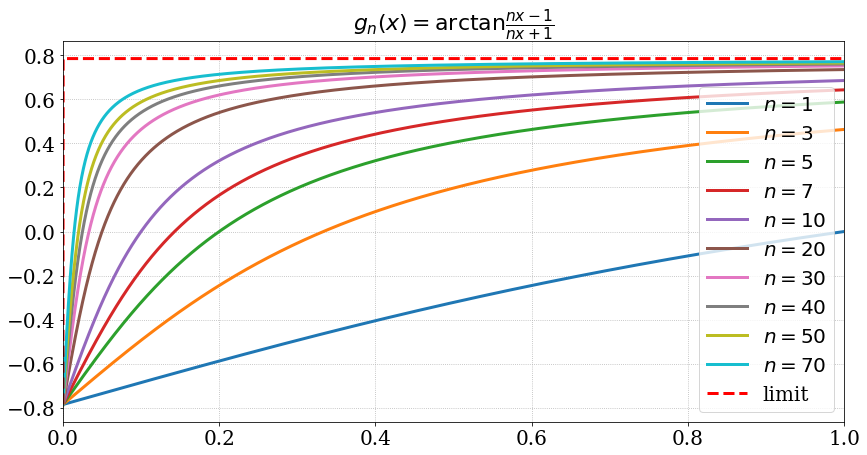

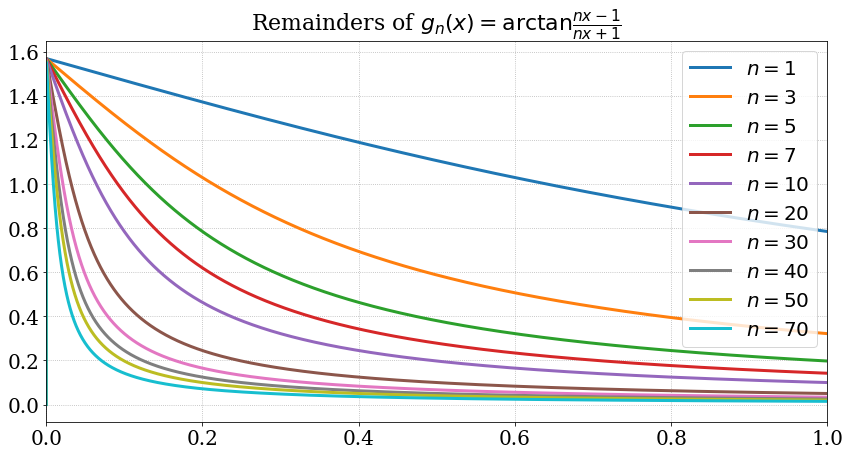

In [342]:
gn_values1 = np.array([1, 3, 5, 7, 10, 20, 30, 40, 50, 70])
g_n.plot('terms', gn_values1, gn_domain1)
g_n.plot('remainders', gn_values1, gn_domain1)

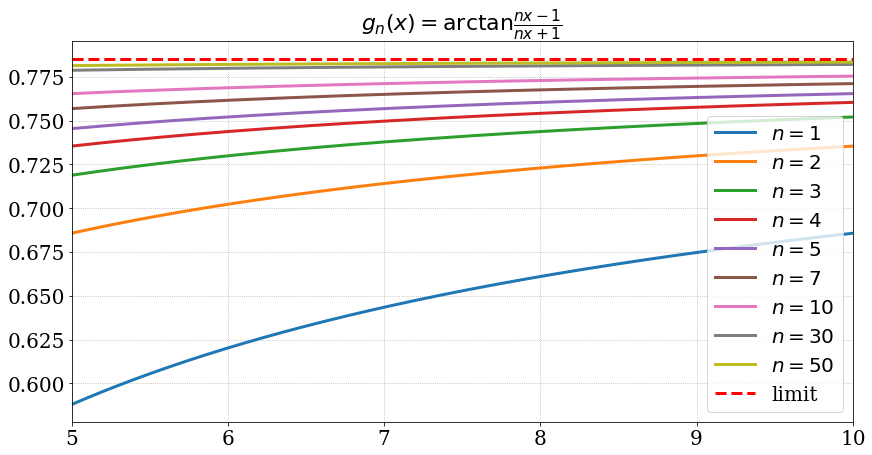

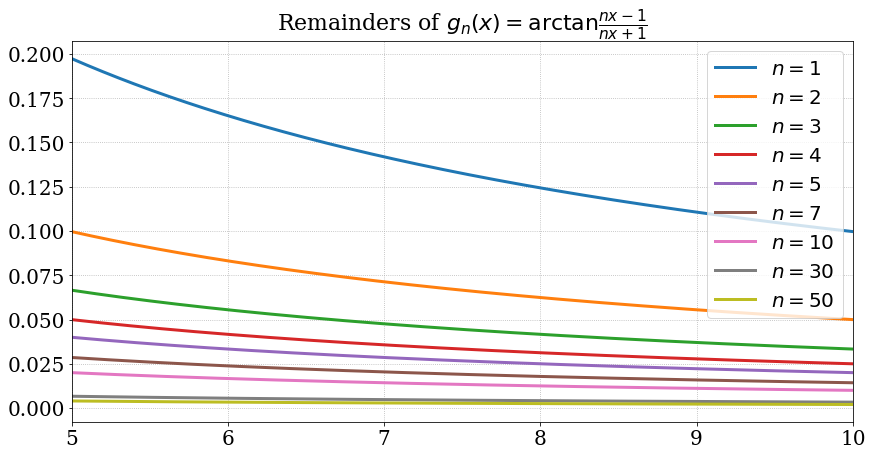

In [343]:
gn_values2 = np.array([1, 2, 3, 4, 5, 7, 10, 30, 50])
g_n.plot('terms', gn_values2, gn_domain2)
g_n.plot('remainders', gn_values2, gn_domain2)

**(2 points) 3.5.** Plot the remainders $r_n = \sup\limits_{[a, b]} r_n(x)$, $n=1,2,\ldots, 40$, for all 4 cases from the previous point. Use the logarighmic scale if needed. Which of them seem to be tending to 0 (meaning the uniform convergence), and which do not?

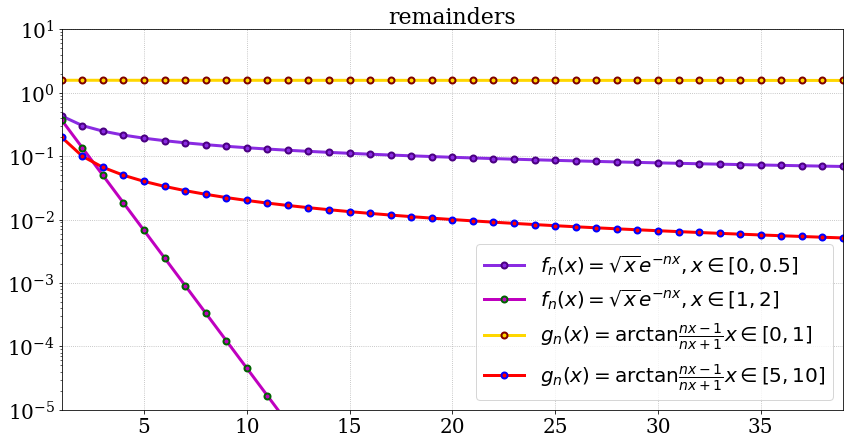

In [344]:
ns = np.arange(1, 40)

fn_remainders_e1 = f_n.suprema(ns, fn_domain1) 
fn_remainders_e2 = f_n.suprema(ns, fn_domain2)
gn_remainders_e1 = g_n.suprema(ns, gn_domain1) 
gn_remainders_e2 = g_n.suprema(ns, gn_domain2) 

plot_sequences([fn_remainders_e1, fn_remainders_e2, gn_remainders_e1, gn_remainders_e2],
               [r'$f_n(x) = \sqrt{x} e^{-nx}, x \in [0, 0.5]$', 
                r'$f_n(x) = \sqrt{x} e^{-nx}, x \in [1, 2]$',
                r'$g_n(x) = \arctan \frac{nx - 1}{nx + 1} x \in [0, 1]$', 
                r'$g_n(x) = \arctan \frac{nx - 1}{nx + 1} x \in [5, 10]$'],
                'remainders', ns=ns, semilogy=True, y_lims=(-5, 1))

The remainders $r_n = \sup\limits_{x\in E_1} \sqrt{x} e^{-nx}$ and $r_n = \sup\limits_{x\in E_2} \sqrt{x} e^{-nx}$ tend to 0. 

$r_n = \sup\limits_{x\in E_2} (\arctan \frac{nx - 1}{nx + 1})$ also tends to 0. $r_n = \sup\limits_{x\in E_1} (\arctan \frac{nx - 1}{nx + 1})$ clearly remain constant.

# 4. Functional series

Given a functional series $\sum\limits_{n=1}^\infty u_n(x)$, which is pointwise convergent on a set $E$, denote

* the sum of the series as $S(x)$;

* the functional sequence of its partial sums as $\{S_n(x)\}$, $S_n(x) = \sum\limits_{k=1}^n u_k(x)$;

* the functional sequence of its remainders as $\{r_n(x)\}$, $r_n(x) = \sum\limits_{k=n+1}^{\infty} u_k(x)$.

The series $\sum\limits_{n=1}^\infty u_n(x)$ is uniformly convergent to $S(x)$ on $E$ if

$$
S_n(x) \rightrightarrows S(x) \text{ on } E \iff r_n(x) \rightrightarrows 0 \text{ on } E \iff
\lim\limits_{n\to\infty} \sup\limits_{x\in E}|r_n(x)| = 0.
$$


**(4 points) 4.1.** Complete the code for the class $\texttt{FunctionalSeries}$. Make sure your code produces the same pictures for the geometric series as listed below.

**Caution!** Solutions using pythonic loops will receive at most **2 points**!

In [148]:
class FunctionalSeries:
    def __init__(self, name, term_implementation, default_sum=np.zeros_like,
                 sum_implementation=None, sum_name=None, infty=None):
        '''
            name, string: label for the series in LaTeX
            term_implementation: a vectorized function calculating the array of terms
            default_sum, float: sum of initial terms (used if starting index is not 1)
            sum_estimation, float: approximate sum of the series (if known)
            sum_name, string: label for the sum of the series in LaTeX
            infty, int: a number large enough for a good estimation of the series sum
        '''
        self.name = name
        self.term_implementation = term_implementation
        self.default_sum = default_sum
        self.sum_implementation = sum_implementation
        self.sum_name = sum_name
        self.infty = infty
    
    def terms(self, ns, domain):
        '''
            Returns a numpy 2d-array [[a_n(x)]], n in ns, x in domain
        '''
        return self.term_implementation(ns, domain)
    
    def calculate_sum(self, begin, end, domain):
        '''
            Calculate the sum u_{begin}(x) + u_{begin + 1}(x) + ... + u_{end - 1}(x) for all x in domain
        '''
        return np.sum(self.terms(np.arange(begin, end, 1), domain), axis=0)
    
    def partial_sums(self, ns, domain):
        '''
            Returns a numpy array [[S_n(x)]], n in ns, x in domain
            where S_n is the partial sum of the series
        '''
        all_ns = np.arange(1, ns[-1] + 1, 1)
        array = np.cumsum(self.terms(all_ns, domain), axis=0) + self.default_sum(domain)
        return array[ns - 1]

    def estimate_sum(self, domain, n_min=1):
        '''
            Estimate the sum of the series as a big enough partial sum:
            u_{n_min}(x) + u_{n_min + 1}(x) + ... + u_{N_big}(x) for x in domain
        '''
        if self.infty != None:
            a = self.infty
            return self.calculate_sum(1, a, domain)
        else:
            return self.sum_implementation(domain)
    
    def remainders(self, ns, domain):
        '''
            Returns a numpy array [[|r_n(x)|]], n in ns, x in domain
            where r_n(x) = S(x) - S_n(x), S is an estimation of the sum of the series
        '''
        return np.absolute(self.estimate_sum(domain) - self.partial_sums(ns, domain))
    
    def suprema(self, ns, domain):
        '''
            ns : np.ndarray of indices
            domain : np.ndarray of points
            Returns a numpy array [max|r_n(x)|], n in ns
        '''
        return np.amax(self.remainders(ns, domain), axis=1)
        
    def plot_sum(self, domain, semilogy=False, y_lims=None):
        plt.figure(figsize=(14, 7))
        plot = plt.semilogy if semilogy else plt.plot
        if self.sum_implementation is not None:
            plot(domain, self.sum_implementation(domain), lw=3, c='r')
        else:
            plot(domain, self.estimate_sum(domain), lw=3, c='r')
        plt.grid(ls=':')
        plt.title('Sum of the series ' + self.name)
        plt.xlim(np.min(domain), np.max(domain))
        if y_lims is not None:
            if semilogy:
                plt.ylim(10 ** y_lims[0], 10 ** y_lims[1])
            else:
                plt.ylim(y_lims[0], y_lims[1])
    
    def plot(self, mode, ns, domain, semilogy=False, y_lims=None):
        plt.figure(figsize=(14, 7))

        #line_colors = np.random.choice(colors, size=len(ns), replace=False)
        # marker_edge_colors = np.random.choice(marker_colors, size=len(functions), replace=False)
        plot = plt.semilogy if semilogy else plt.plot
        
        if mode == 'terms':
            ys = self.terms(ns, domain).T
        elif mode == 'partial sums':
            ys = self.partial_sums(ns, domain).T
        elif mode == 'remainders':
            ys = self.remainders(ns, domain).T
        plot(domain, ys, lw=3)
        
        label_list = [r'$n={}$'.format(i) for i in ns]
        if mode == 'partial sums':
            if self.sum_implementation is not None:
                plot(domain, self.sum_implementation(domain), lw=3, ls='--', c='r')
                label_list.append(r"$S(x)$" if self.sum_name is None else self.sum_name)
            else:
                plot(domain, self.estimate_sum(domain), lw=3, ls='--', c='r')
                label_list.append(r"$S(x)$" if self.sum_name is None else self.sum_name)
            
        plt.grid(ls=':')
        title = self.name
        if self.sum_name is not None:
            title += '=' + self.sum_name
        plt.title(title + ', ' + mode)
        plt.xlim(np.min(domain), np.max(domain))
        if y_lims is not None:
            if semilogy:
                plt.ylim(10 ** y_lims[0], 10 ** y_lims[1])
            else:
                plt.ylim(y_lims[0], y_lims[1])
        plt.legend(label_list);

Consider the geometric series: $\sum\limits_{n=0}^\infty x^n = \frac 1{1-x}$, $|x| < 1$. Here the set $E = (-1, 1)$ is an open interval, and we'll emulate it as $-1+\delta, -1 +2\delta, \ldots, 1 - 2\delta, 1 - \delta$ for some small $\delta > 0$.

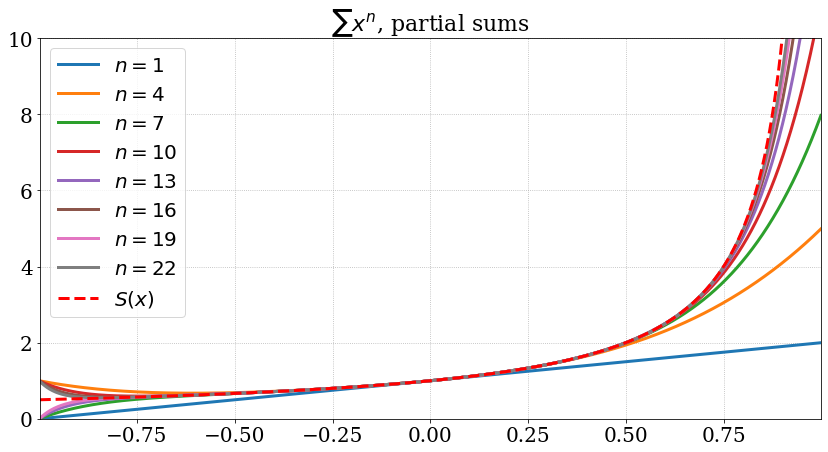

In [149]:
def geometric_terms(ns, domain):
    xs_grid, ns_grid = np.meshgrid(domain, ns)
    return xs_grid ** ns_grid

geometric_series = FunctionalSeries(r"$\sum{x^n}$", geometric_terms, 
                                    default_sum=np.ones_like,
                                    sum_implementation=lambda x: 1 / (1 - x))

EPS = 0.001
domain = np.linspace(-1 + EPS, 1 - EPS, int((2 - EPS) / EPS))
geometric_series.plot('partial sums', np.arange(1, 24, 3), domain, y_lims=(0, 10))

The partial sums do not fit well to the sum of the series $S(x) = \frac 1{1-x}$, when $x$ is close to $\pm 1$. More clearly this can be seen on the remainders plot:

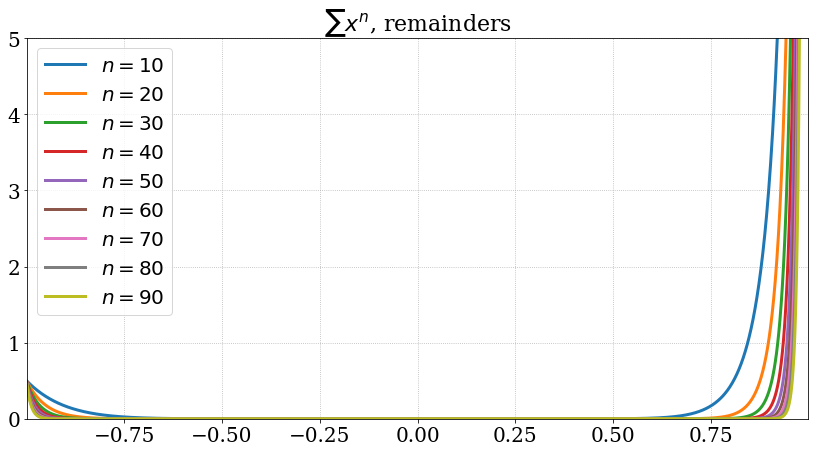

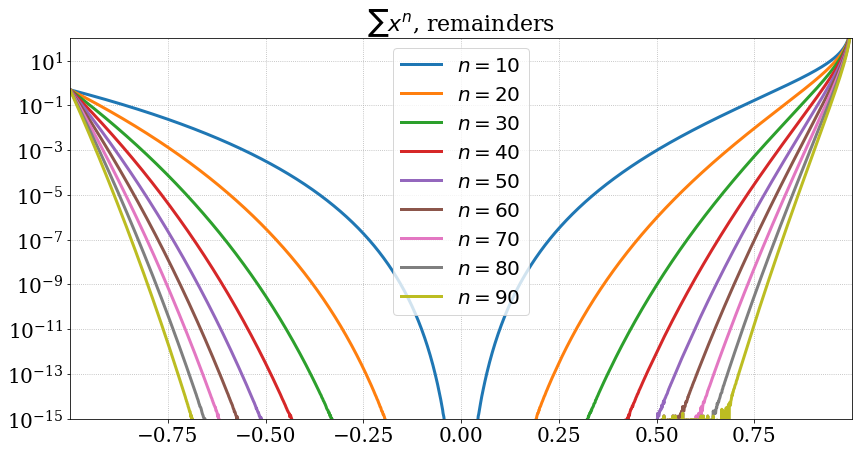

In [150]:
geometric_series.plot('remainders', np.arange(10, 100, 10), domain, y_lims=(0, 5))
geometric_series.plot('remainders', np.arange(10, 100, 10), domain, semilogy=True, y_lims=(-15, 2))

Let's study the behaviour at the boundary points in more details. Consider three intervals: $[-0.8, 0.8]$, $(-1, -0.9]$, $[0.9, 1)$.

In [151]:
N_RANGE = np.arange(10, 101, 10)
inner_domain = np.linspace(-0.8, 0.8, 401)
left_domain = np.linspace(-1, -0.9, 401)

# since the geometric series is divergent ant x = 1, the right endpoint is excluded
right_domain = np.linspace(0.9, 1, 400, endpoint=False)

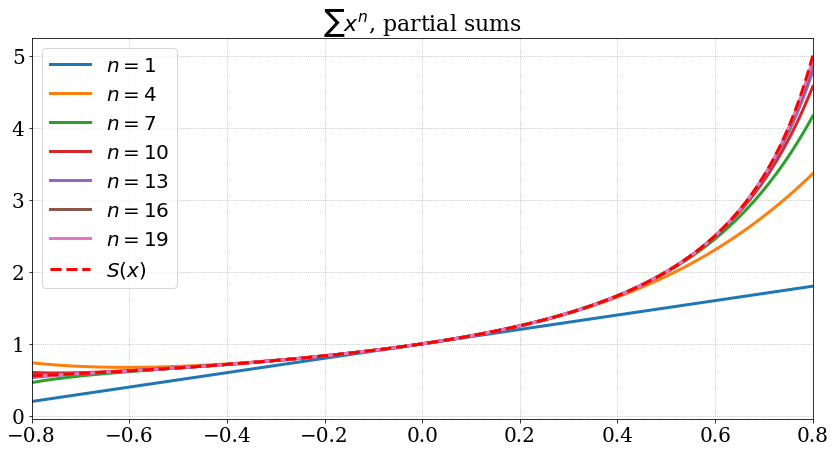

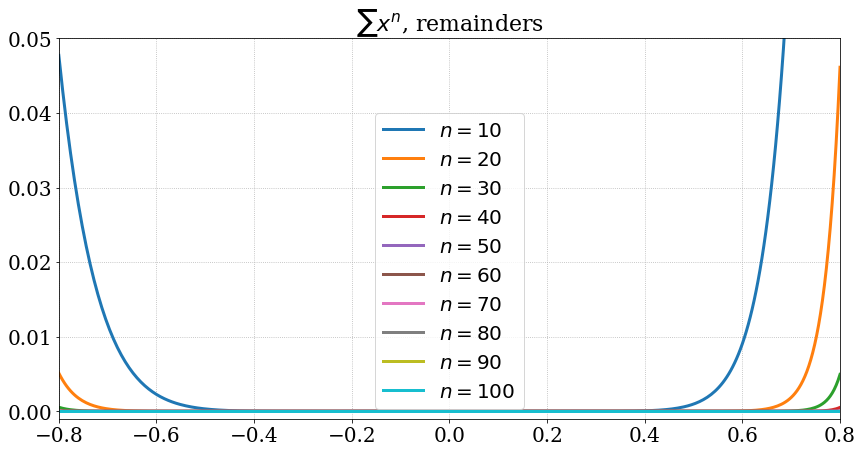

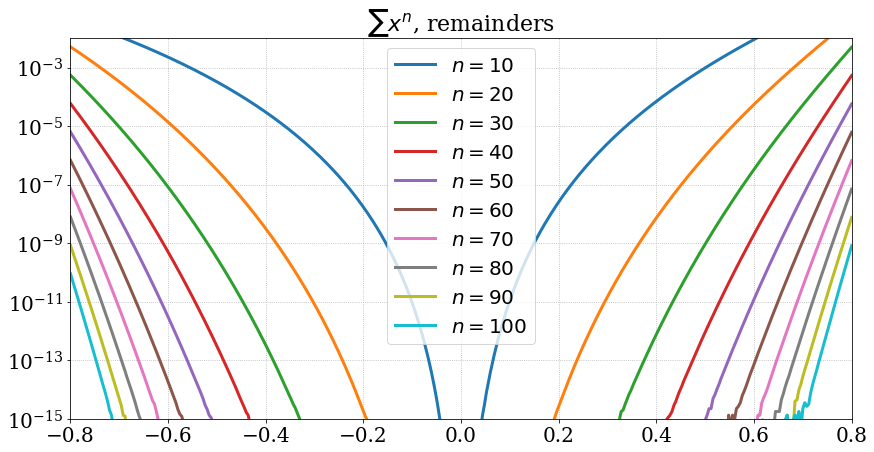

In [152]:
geometric_series.plot('partial sums', np.arange(1, 20, 3), inner_domain)
geometric_series.plot('remainders', N_RANGE, inner_domain, y_lims=(-0.001, 0.05))
geometric_series.plot('remainders', N_RANGE, inner_domain, semilogy=True, y_lims=(-15, -2))

While studying the behaviour of the remainders, the logarithmic scale is much more informative here, because in the usual scale several lines are completely hidden by the last one. We can see from the last plot, that the geometric series is uniformly convergent on $[-0.8, 0.8]$ (compare with the example from lecture 5, p. 18).

Now investigate what's happening at the boundary points:

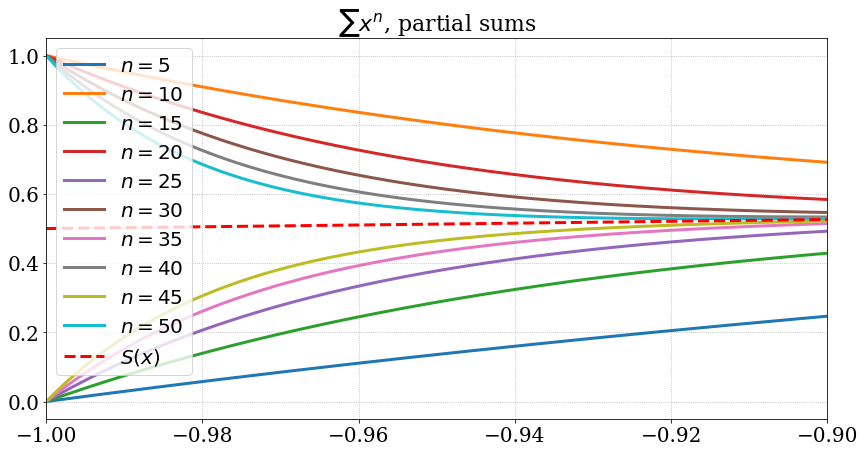

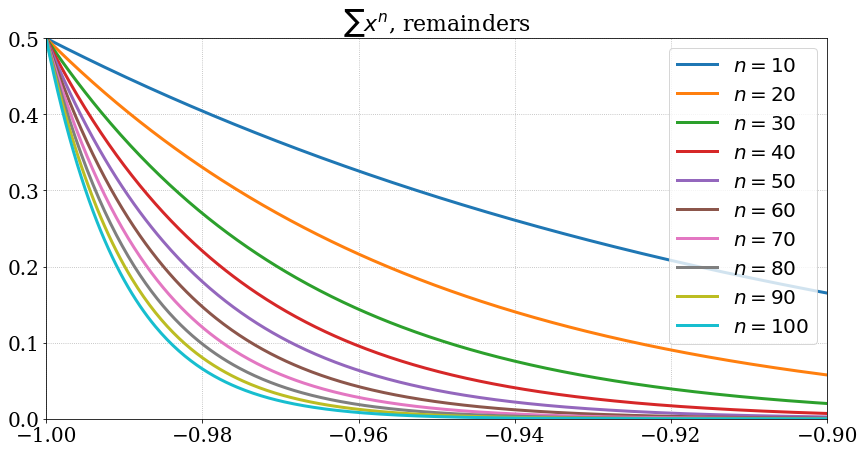

In [153]:
geometric_series.plot('partial sums', N_RANGE // 2, left_domain)
geometric_series.plot('remainders', N_RANGE, left_domain, y_lims=(0, 0.5))

Here we don't need the logarithmic scale; it's clear enough that $\sup\limits_{x\in(-1, -0.9]}|r_n(x)| = \frac 12$, therefore, the convergence of the series on $(-1, 0.9]$ is nonuniform.

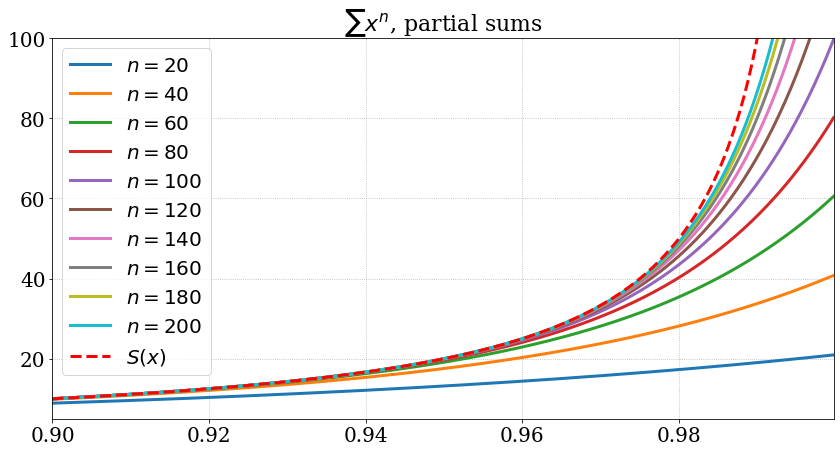

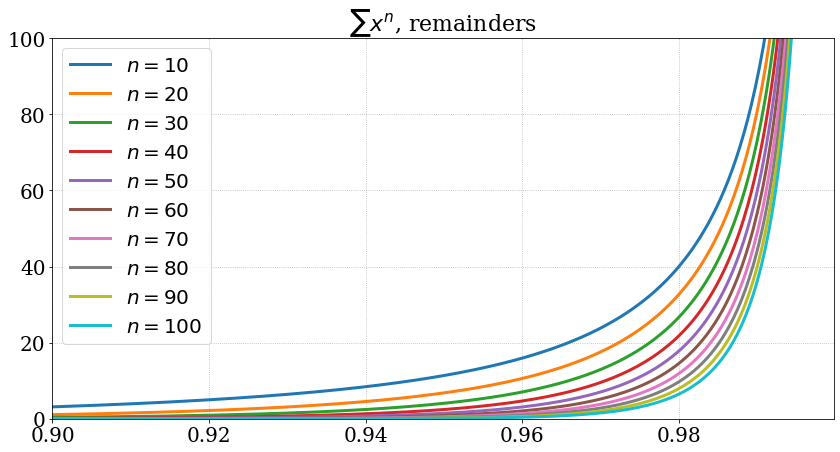

In [154]:
geometric_series.plot('partial sums', 2 * N_RANGE, right_domain, y_lims=(5, 100))
geometric_series.plot('remainders', N_RANGE, right_domain, y_lims=(0, 100))

Once again, there is no necessity in the logarithmic scale; the convergence of the series on $[0.9, 1)$ is nonuniform, since $\sup\limits_{x\in[0.9, 1)}|r_n(x)| = +\infty$.

Finally, plot the sequences $r_n = \sup\limits_{[a, b]}|r_n(x)|$:

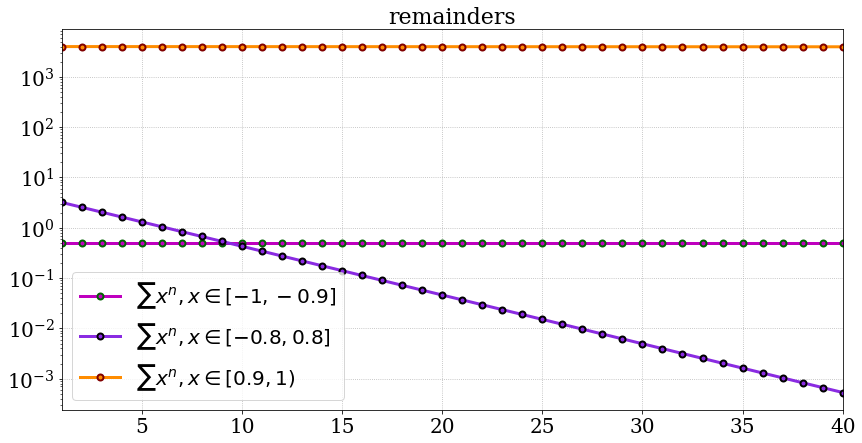

In [155]:
ns = np.arange(1, 41)
remainders_left = geometric_series.suprema(ns, left_domain)
remainders_inner = geometric_series.suprema(ns, inner_domain)
remainders_right = geometric_series.suprema(ns, right_domain)
plot_sequences([remainders_left, remainders_inner, remainders_right],
               [r"$\sum{x^n}, x\in[-1, -0.9]$", r"$\sum{x^n}, x\in[-0.8, 0.8]$", r"$\sum{x^n}, x\in[0.9, 1)$"],
               'remainders', ns=ns, semilogy=True)

It is clear from the plots that $r_n \to 0$ only for $[-0.8, 0.8]$, otherwise the sequence $r_n$ is not infinitesimal.

# 5. Properties of the sums of seires

Let $S(x) = \sum\limits_{n=1}^\infty \frac{\cos nx}{n\sqrt n}$.

**(2 points) 5.1.** Show that the series converges everywhere and 

* the function $S(x)$ is even, i.e., $S(-x) = S(x)$;
* the function $S(x)$ is $2\pi$-periodic, i.e., $S(x + 2\pi) = S(x)$;
* $S \in C(\mathbb R)$

*YOUR SOLUTION HERE*

**(2 points) 5.2.** Complete the code for the series in question. Plot the graphs of $S$ on the segments $[-\pi, \pi]$, $[-2\pi, 2\pi]$, $[-3\pi, 3\pi]$. Do these graphs satisfy the properties from the previous problem? Looking at the graph, can you find any points at which $S'(x)$ does not exist?

In [11]:
def cos_terms(ns, domain, alpha=1.5):
    # YOUR CODE HERE
    pass

cos_series = FunctionalSeries(r"$\sum\frac{\cos nx}{n\sqrt{n}}$", cos_terms, infty=10**5)
# YOUR CODE HERE

**(3 points) 5.3.** Plot the graphs of several partial sums and remainders on the segments $[-\pi, \pi]$, $[-\pi, -0.1]$, $[-0.05, 0.05]$, $[\frac\pi 2, \frac{3\pi}2]$.

Notes:

* The partial sums should be distinguishable from the sum $S(x)$, but it should be clear from the graphs, that $\lim\limits_{n\to\infty} S_n(x) = S(x)$.
* From the remainders plot it should be clear that the series is uniformly convergent on each segment.
* The quality of the graphs is essential!

In [ ]:
# YOUR CODE HERE

**(1 points) 5.4.** Plot the graphs of the remainders $\sup\limits_{x\in[a, b]}|r_n(x)|$ for the segments $[a,b]$ from the previous point. Do they tend to zero as $n \to \infty$?

In [10]:
# YOUR CODE HERE

# 6. Taylor series

The Taylor series of a function $f\in C^{\infty}(x_0 - \varepsilon, x_0 + \varepsilon)$, $\varepsilon > 0$, at point $x_0$ is the power series
$$
f(x_0) + \frac{f'(x_0)}{1!}(x-x_0) + \frac{f''(x_0)}{2!}(x-x_0)^2 + \ldots  = \sum\limits_{n=0}^\infty \frac{f^{(n)}(x_0)}{n!}(x-x_0)^n.
$$

The Taylor series centered at $x_0=0$ is often called the Maclaurin series. For the function $f(x) = \sinh x$ we have
$$
\sinh x = x + \frac {x^3}{6} + \frac {x^5}{120} +\frac{x^7}{5040} + \ldots +\frac{x^{2n+1}}{(2n+1)!} + \ldots= \sum\limits_{n=0}^\infty \frac{x^{2n+1}}{(2n+1)!}
$$

**(1 points) 6.1.** Show that this power series is uniformly convergent on every segment $[-a, a]$, $a > 0$.

*YOUR SOLUTION HERE*

**(3 points) 6.2.** Complete the code for the Maclaurin series in question. Plot the graphs of partial sums and remainders for the segments $[-1, 1]$, $[-5, 5]$, $[-10, 10]$. 

Notes:

* Try to choose the most appropriate values of $n$ for each segment.
* Use the logarithmic scale if needed.
* The quality of the graphs is essential!

In [9]:
def alternate_sinh(ns):
    result = np.zeros_like(ns)
    result[ns % 2 == 1] = 1
    return result

def sinh_terms(ns, domain):
    # YOUR CODE HERE
    pass

sinh_series = FunctionalSeries(r"$\sum{\frac{x^{2n+1}}{(2n+1)!}}$",
                               sinh_terms, 
                               sum_implementation=np.sinh,
                               sum_name=r"$\sinh x$")
# YOUR CODE HERE

**(1 points) 6.3.** Plot the graphs of the remainders $\sup\limits_{x\in[a,a]}|r_n(x)|$, $a =1, 5, 10$. Do they tend to zero as $n \to \infty$?

In [8]:
# YOUR CODE HERE